<a href="https://colab.research.google.com/github/ab-hix/Air-Quality-and-Health-Correlation-Analysis/blob/main/Air%20Quality%20and%20Health%20Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import grangercausalitytests
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

In [ ]:
air = pd.read_csv('/content/city_day.csv', parse_dates=['Date'])

# Rename column for consistency
air.rename(columns={'Date': 'date'}, inplace=True)

# Optional: Filter for one city (to match with health data timeline)
air = air[air['City'] == 'Delhi']

# Keep only needed columns
air = air[['date', 'PM2.5', 'PM10', 'NO2', 'O3']]

In [ ]:
date_rng = pd.date_range(start='2018-01-01', end='2019-12-31', freq='D')
hospital_admissions = np.random.poisson(
    lam=50 + np.sin(np.arange(len(date_rng))/30)*10,
    size=len(date_rng)
)

health_data = pd.DataFrame({
    'date': date_rng,
    'hospital_admissions': hospital_admissions
})

In [ ]:
data = pd.merge(air, health_data, on='date', how='inner')

# Sort by date
data = data.sort_values('date')

# -------------------------
# 5. Handle Missing Values
# -------------------------
data = data.interpolate(method='linear')

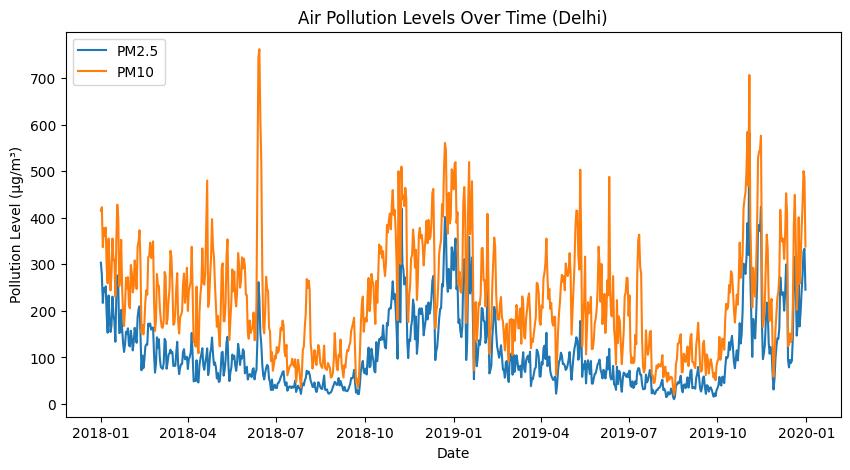

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=data, x='date', y='PM2.5', label='PM2.5')
sns.lineplot(data=data, x='date', y='PM10', label='PM10')
plt.title("Air Pollution Levels Over Time (Delhi)")
plt.xlabel("Date")
plt.ylabel("Pollution Level (µg/m³)")
plt.legend()
plt.show()


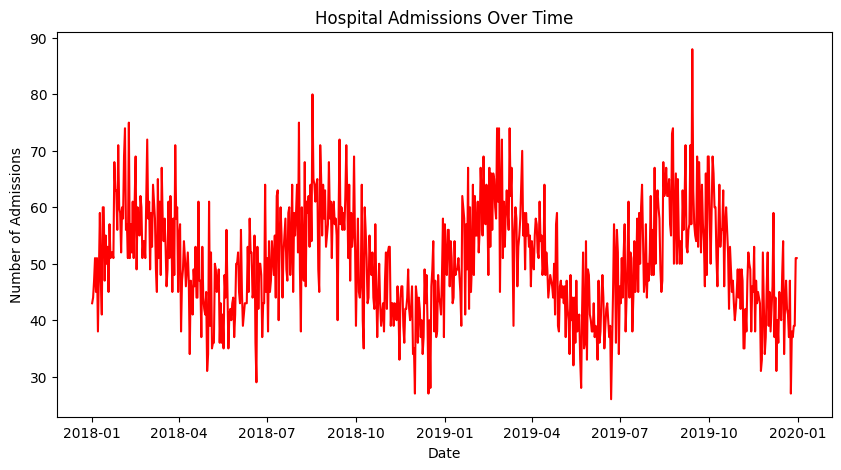

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=data, x='date', y='hospital_admissions', color='red')
plt.title("Hospital Admissions Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Admissions")
plt.show()

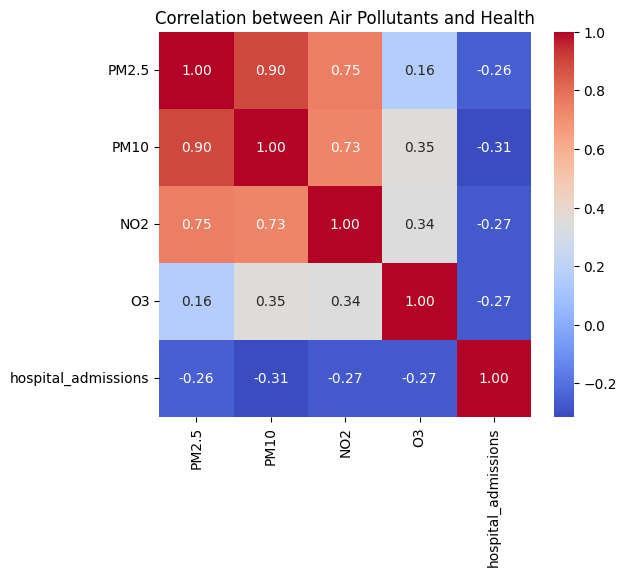

In [ ]:
corr = data[['PM2.5', 'PM10', 'NO2', 'O3', 'hospital_admissions']].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Air Pollutants and Health")
plt.show()

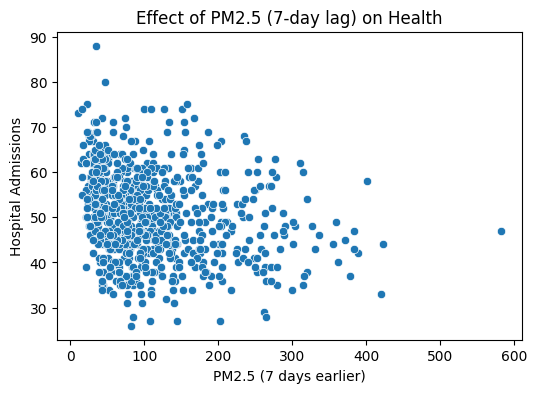

In [ ]:
data['PM2.5_lag1'] = data['PM2.5'].shift(1)
data['PM2.5_lag7'] = data['PM2.5'].shift(7)

plt.figure(figsize=(6,4))
sns.scatterplot(x='PM2.5_lag7', y='hospital_admissions', data=data)
plt.title("Effect of PM2.5 (7-day lag) on Health")
plt.xlabel("PM2.5 (7 days earlier)")
plt.ylabel("Hospital Admissions")
plt.show()


In [ ]:
features = ['PM2.5', 'PM10', 'NO2', 'O3']
X = data[features].fillna(0)
y = data['hospital_admissions']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

print(f"R² Score: {r2_score(y, y_pred):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y, y_pred):.3f}")

R² Score: 0.129
Mean Absolute Error: 7.203


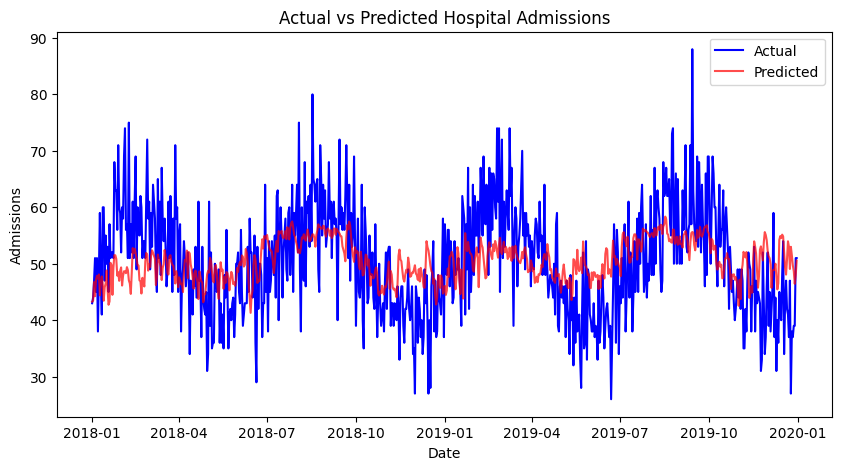

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(data['date'], y, label='Actual', color='blue')
plt.plot(data['date'], y_pred, label='Predicted', color='red', alpha=0.7)
plt.title("Actual vs Predicted Hospital Admissions")
plt.xlabel("Date")
plt.ylabel("Admissions")
plt.legend()
plt.show()